<a href="https://colab.research.google.com/github/Sneezzzzzze/Momentum/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
%cd /content/model2

# Download and unzip the dataset
!curl -L "https://public.roboflow.com/ds/DEP23DHlNa?key=sALMyrmpLS" > roboflow.zip
!unzip roboflow.zip
!rm roboflow.zip

Streaming output truncated to the last 5000 lines.
 extracting: valid/labels/000000000139_jpg.rf.e21873da59c8d102916fa46e9a7d62f3.txt  
 extracting: valid/labels/000000000285_jpg.rf.60e3658db36698420a03e3fc071943f0.txt  
 extracting: valid/labels/000000000632_jpg.rf.bfddd0d2b86ac2bf1e80624422433f0a.txt  
 extracting: valid/labels/000000000724_jpg.rf.905934be986f8fbaedec06c48141a84e.txt  
 extracting: valid/labels/000000000776_jpg.rf.3a6b1375e3360b81da552a3054355666.txt  
 extracting: valid/labels/000000000785_jpg.rf.e08b383cecfdaaa774b3780ab5e06baa.txt  
 extracting: valid/labels/000000000802_jpg.rf.9717c2d9df9e467803d11f211672d1c4.txt  
 extracting: valid/labels/000000000872_jpg.rf.89b5c1b297b29c118dd11a202d91d647.txt  
 extracting: valid/labels/000000000885_jpg.rf.9bedbaab383445bc7ad6b3711224be3b.txt  
 extracting: valid/labels/000000001000_jpg.rf.a3c5a2484544de19f7cb041f2eb43605.txt  
 extracting: valid/labels/000000001268_jpg.rf.48cbad51033f60a71d4370e1b6cb12ca.txt  
 extracting: v

rm: cannot remove 'roboflow.zip': No such file or directory


In [4]:
print('현재 작업 경로 :', os.getcwd())
os.chdir('/content')
print('변경된 작업 경로 :', os.getcwd())

현재 작업 경로 : /content/model2
변경된 작업 경로 : /content


In [5]:
!git clone https://github.com/ultralytics/yolov5  # YOLOv5 레퍼지토리 clone

Cloning into 'yolov5'...
remote: Enumerating objects: 16960, done.
remote: Counting objects: 100% (155/155), done.
remote: Compressing objects: 100% (109/109), done.
remote: Total 16960 (delta 79), reused 98 (delta 46), pack-reused 16805 (from 1)
Receiving objects: 100% (16960/16960), 15.70 MiB | 17.54 MiB/s, done.
Resolving deltas: 100% (11617/11617), done.


In [6]:
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import yaml
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 873.6/873.6 kB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.4 MB/s eta 0:00:00
Setup complete. Using torch 2.4.1+cu121 (Tesla T4)


In [8]:
data_dir = '/content/model2'
data_yaml = '/content/model2/data.yaml'


In [7]:
%cd ..
%cd /content/model2/
!mkdir test
!mkdir test/images
!mkdir test/labels

!find train/labels/ -name "*.txt" | xargs cp -t test/labels/

/content
/content/model2


In [64]:
# 데이터셋 yaml 파일 확인
with open(data_yaml) as f:
    film = yaml.load(f, Loader=yaml.FullLoader)
    display(film)

{'names': ['persons'],
 'nc': 1,
 'train': '/content/model2/train/images',
 'val': '/content/model2/test/images'}

In [65]:
film['train'] = '/content/model2/train/images'
film['val'] = '/content/model2/test/images'

with open(data_yaml, 'w') as f:
    yaml.dump(film, f)

print('변경된 yaml 파일 :')
with open(data_yaml) as f:
    film = yaml.load(f, Loader=yaml.FullLoader)
    display(film)

변경된 yaml 파일 :


{'names': ['persons'],
 'nc': 1,
 'train': '/content/model2/train/images',
 'val': '/content/model2/test/images'}

In [66]:
%cd /content/yolov5
!python train.py --img 416 --batch 16 --epochs 150 --data /content/model2/data.yaml --weights yolov5s.pt --cache

/content/yolov5
2024-09-20 10:07:24.656936: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-20 10:07:24.689645: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-20 10:07:24.699589: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/model2/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scal

In [29]:
test_data_dir = film['val']

# 실험 번호 지정 - 진행한 실험이 저장된 경로 확인해서 기입! - runs/train/exp1 인지 exp2, exp3 인지 확인 후 아래 번호 지정
train_exp_num = 2

In [70]:
!python detect.py --weights runs/train/exp{train_exp_num}/weights/best.pt --img 1280 --conf 0.1 --source "{test_data_dir}"

detect: weights=['runs/train/exp2/weights/best.pt'], source=/content/model2/test/images, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-366-gf7322921 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/11 /content/model2/test/images/20240822132958147_UTC+07.jpg: 960x1280 8 benchs, 1 car, 12 chairs, 5 diningtables, 25 persons, 2 traffic lights, 1 train, 2 tvmonitors, 1 umbrella, 31.4ms
image 2/11 /content/model2/test/images/20240822132958272_UTC+07.jpg:

In [69]:
!rm -rf /content/yolov5/runs/detect/exp
!rm -rf /content/yolov5/runs/detect/exp2
!rm -rf /content/yolov5/runs/detect/exp3
!rm -rf /content/yolov5/runs/detect/exp4
!rm -rf /content/yolov5/runs/detect/exp5
!rm -rf /content/yolov5/runs/detect/exp6
!rm -rf /content/yolov5/runs/detect/exp7
!rm -rf /content/yolov5/runs/detect/exp8
!rm -rf /content/yolov5/runs/detect/exp9
!rm -rf /content/yolov5/runs/detect/exp10
!rm -rf /content/yolov5/runs/detect/exp11



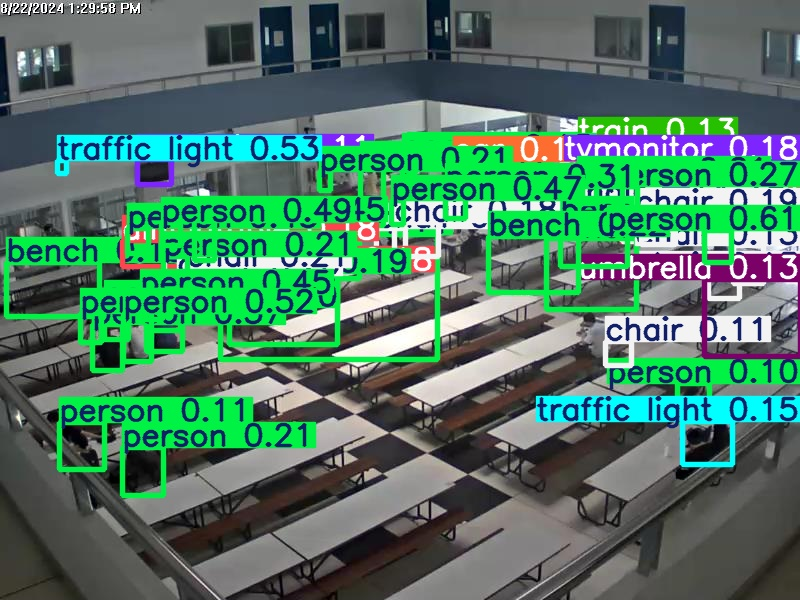

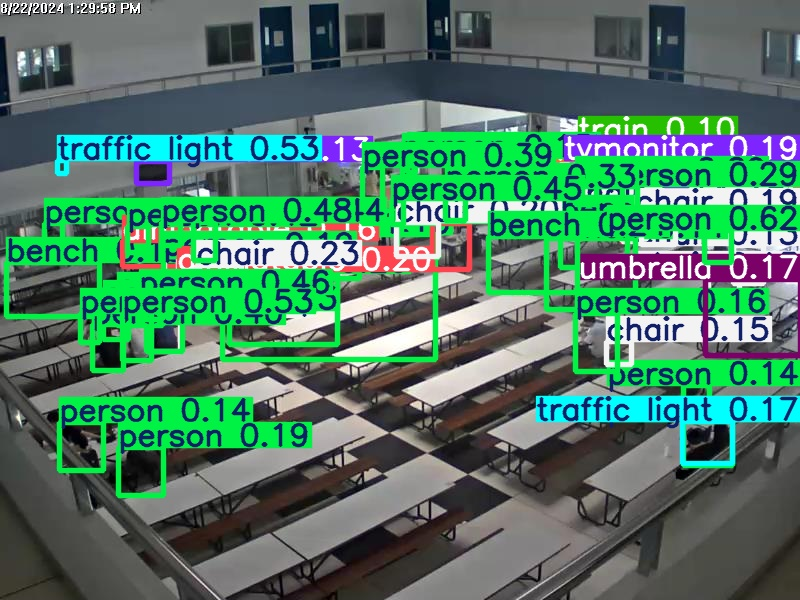

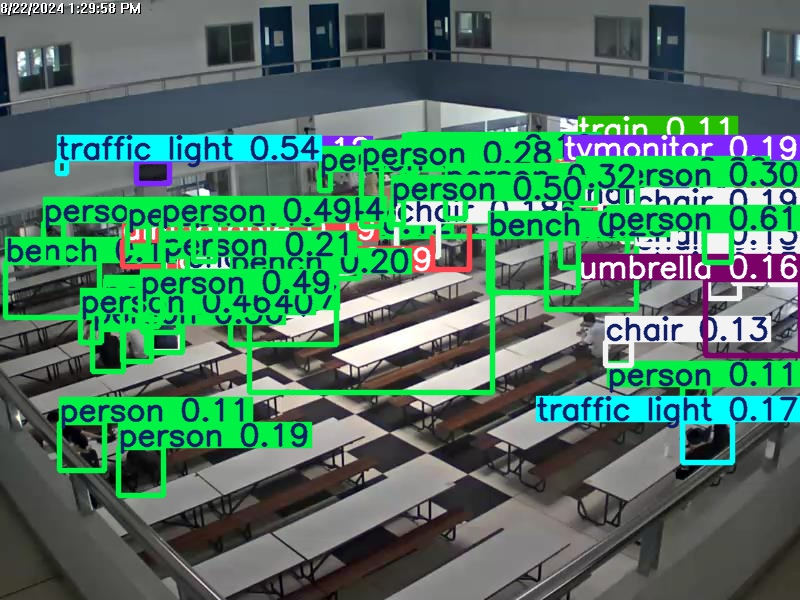

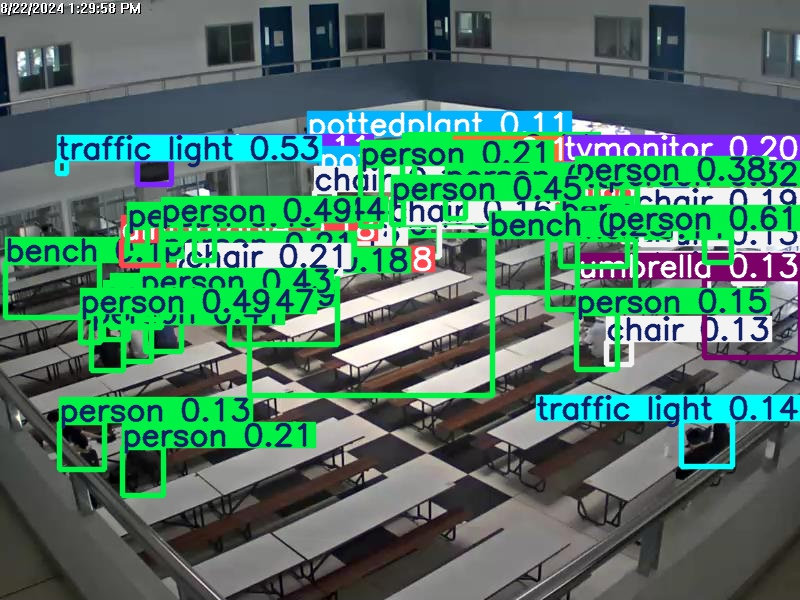

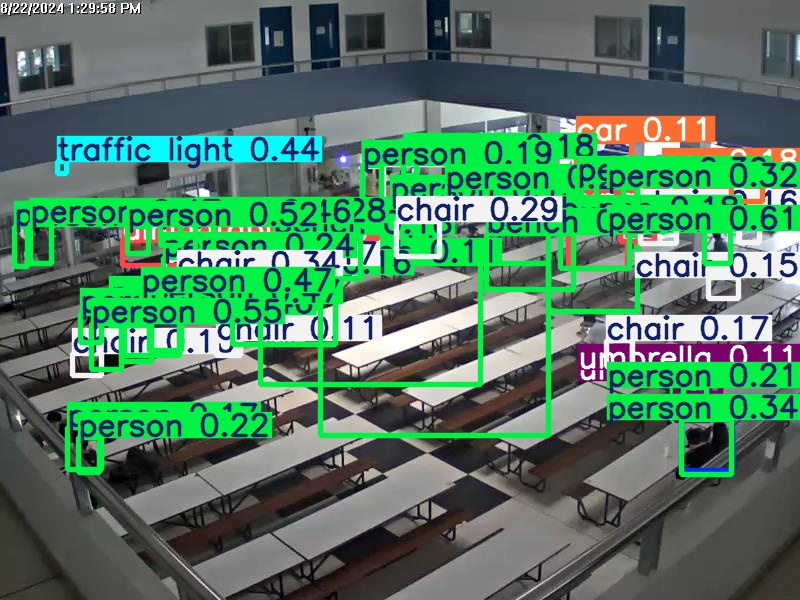

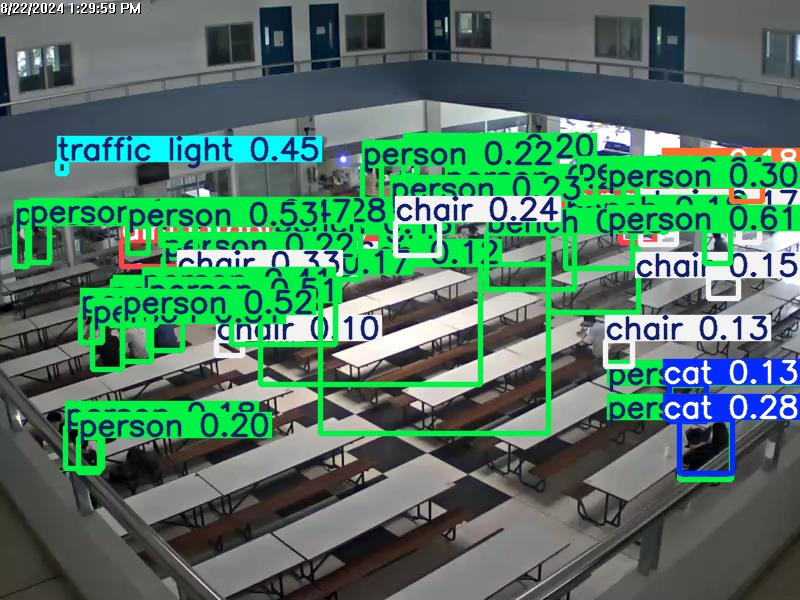

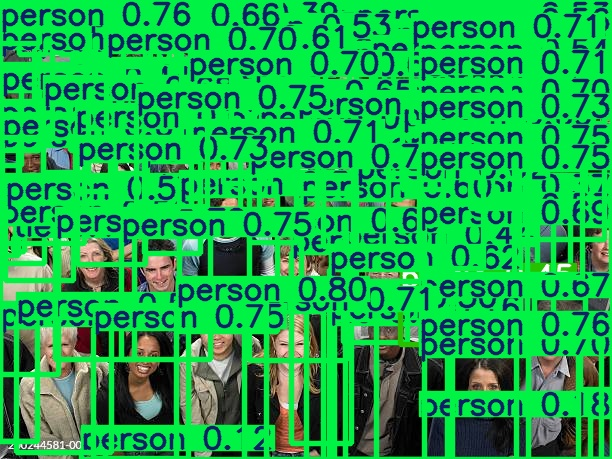

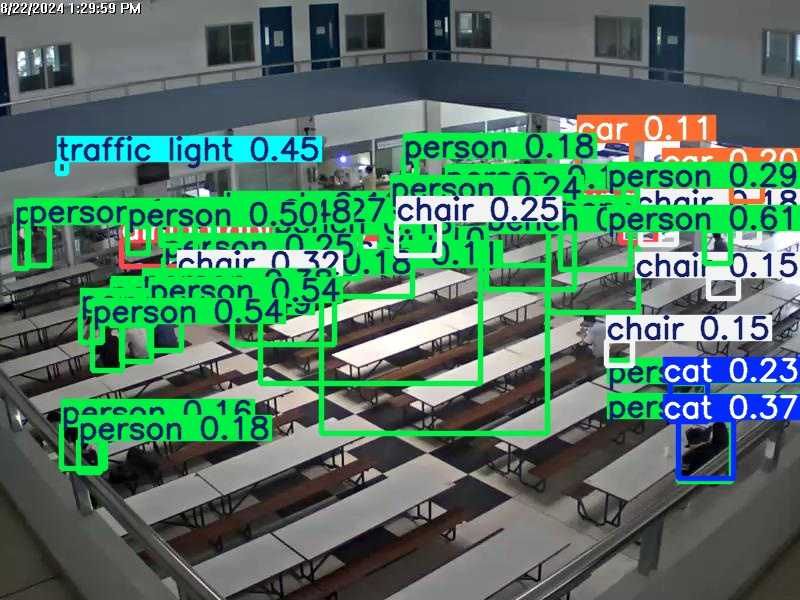

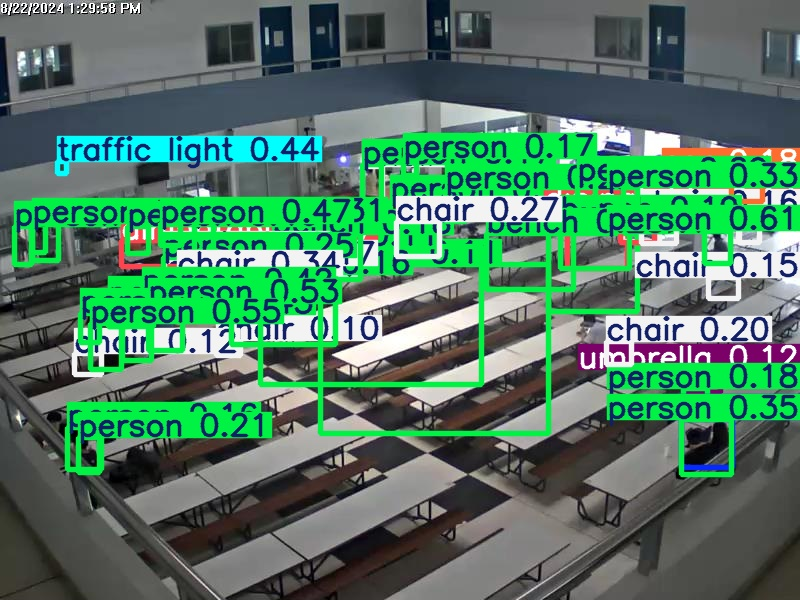

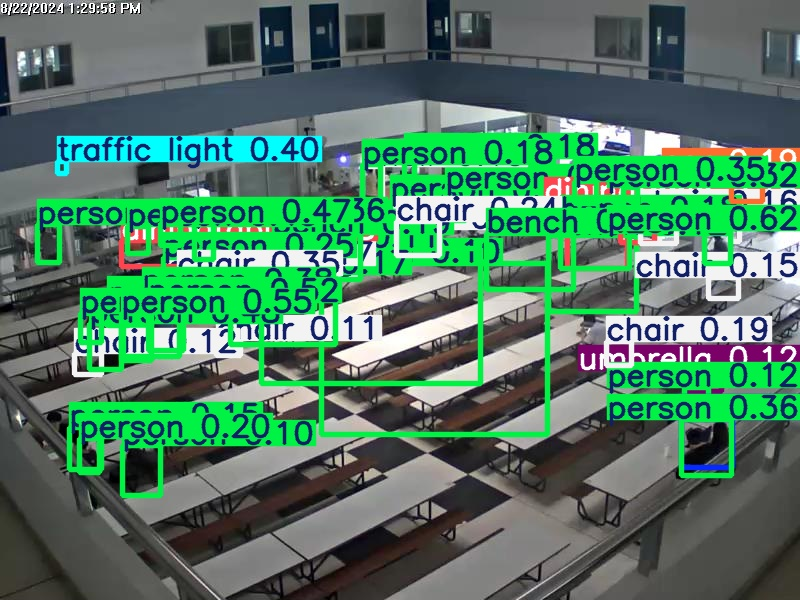

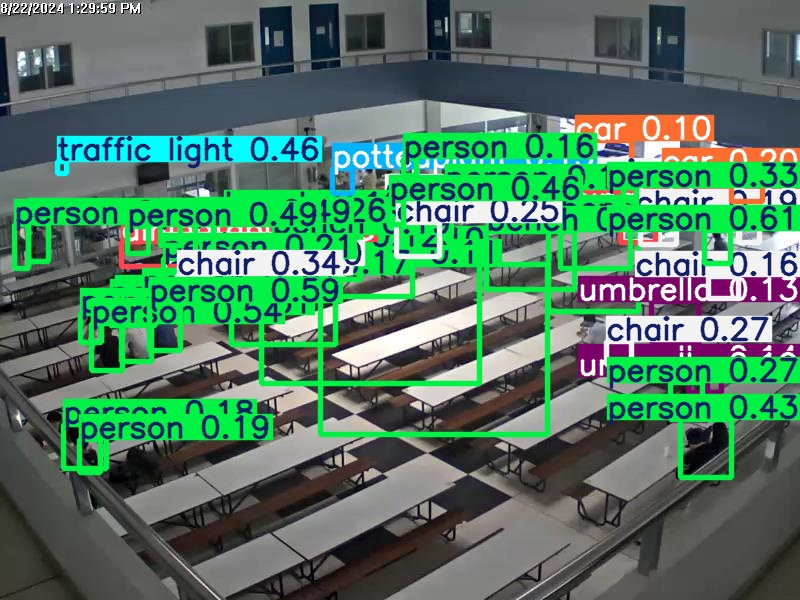

In [58]:
import glob
from IPython.display import Image, display

test_exp_num = 7

if not os.path.exists('/content/yolov5/runs/detect/exp' + str(test_exp_num) + '/') :
  raise Exception('test_exp_num 을 다시 확인하세요.')

for imageName in glob.glob('/content/yolov5/runs/detect/exp' + str(test_exp_num) + '/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

In [60]:
from google.colab import files
files.download('./runs/train/exp' + str(2) + '/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>